# RNN Minimum Wages Europe

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#training data
td = pd.read_csv("currestat.csv")

In [66]:
td.head()

,DATAFLOW,LAST UPDATE,freq,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,1999-S2,45.12,NaN
1,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,2000-S1,46.98,NaN
2,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,2000-S2,52.36,NaN
3,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,2001-S1,52.80,NaN
4,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,EUR,AL,2001-S2,60.13,NaN


In [67]:
td.shape

(5349, 8)

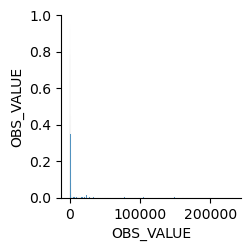

In [68]:
sns.pairplot(td)

In [69]:
td.describe()

,OBS_VALUE
count,3837.000000
mean,2699.689805
std,12927.692364
min,6.850000
25%,364.900000
50%,683.760000
75%,1203.360000
max,232000.000000


In [70]:
td.describe(include=object)

,DATAFLOW,LAST UPDATE,freq,currency,geo,TIME_PERIOD,OBS_FLAG
count,5349,5349,5349,5349,5349,5349,1570
unique,1,1,1,3,37,50,2
top,ESTAT:EARN_MW_CUR(1.0),21/07/23 11:00:00,S,NAC,US,2020-S2,z
freq,5349,5349,5349,1784,150,111,1512


In [71]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5349 entries, 0 to 5348
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     5349 non-null   object 
 1   LAST UPDATE  5349 non-null   object 
 2   freq         5349 non-null   object 
 3   currency     5349 non-null   object 
 4   geo          5349 non-null   object 
 5   TIME_PERIOD  5349 non-null   object 
 6   OBS_VALUE    3837 non-null   float64
 7   OBS_FLAG     1570 non-null   object 
dtypes: float64(1), object(7)
memory usage: 334.4+ KB


In [73]:
td = td.iloc[:,6].values

In [74]:
type(td)

numpy.ndarray

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
td = scaler.fit_transform(td.reshape(-1,1))

In [78]:
x_td = []
y_td = []

Our data shows 48 semesters, therefore we are going to use our 24 semesters to predict 

In [79]:
for i in range(24, len(td)):
    x_td.append(td[i-24:i, 0])
    y_td.append(td[i,0])

In [80]:
x_td = np.array(x_td)
y_td = np.array(y_td)

In [81]:
print(x_td.shape)

print(y_td.shape)

(5325, 24)
(5325,)


In [82]:
x_td = np.reshape(x_td, (x_td.shape[0],
                         x_td.shape[1],
                         1))

In [19]:
print(x_td.shape)

(5325, 24, 1)


In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [102]:
rnn = Sequential()

In [103]:
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_td.shape[1],1)))

In [104]:
rnn.add(Dropout(0.2))

In [105]:
rnn.add(LSTM(units = 45, return_sequences =True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45, return_sequences =True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45))
rnn.add(Dropout(0.2))

In [106]:
rnn.add(Dense(units = 1))

In [107]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [108]:
rnn.fit(x_td, y_td, epochs = 50, batch_size =40)

Epoch 1/50
134/134 [==============================] - 22s 52ms/step - loss: nan
Epoch 2/50
134/134 [==============================] - 7s 54ms/step - loss: nan
Epoch 3/50
134/134 [==============================] - 7s 54ms/step - loss: nan
Epoch 4/50
134/134 [==============================] - 7s 54ms/step - loss: nan
Epoch 5/50
134/134 [==============================] - 7s 53ms/step - loss: nan
Epoch 6/50
134/134 [==============================] - 7s 52ms/step - loss: nan
Epoch 7/50
134/134 [==============================] - 7s 53ms/step - loss: nan
Epoch 8/50
134/134 [==============================] - 7s 53ms/step - loss: nan
Epoch 9/50
134/134 [==============================] - 7s 53ms/step - loss: nan
Epoch 10/50
134/134 [==============================] - 7s 53ms/step - loss: nan
Epoch 11/50
134/134 [==============================] - 7s 52ms/step - loss: nan
Epoch 12/50
134/134 [==============================] - 7s 54ms/step - loss: nan
Epoch 13/50
134/134 [===========================

In [35]:
testdata = pd.read_csv('mweu.csv')

In [36]:
testdata

,European Union,per hour in EUR****,Unnamed: 2,last adjustment,Unnamed: 4,"per hour in PPP (purchasing power parities, EUR)*****",Unnamed: 6,Unnamed: 7
0,Luxembourg,13.80,NaN,01/01/2023,NaN,Germany,NaN,10.55
1,Germany,12.00,NaN,01/10/2022,NaN,Belgium,NaN,9.91
2,Belgium,11.85,NaN,01/12/2022,NaN,Luxembourg,NaN,9.89
3,Netherlands,11.75,NaN,01/01/2023,NaN,Netherlands,NaN,9.62
4,Ireland,11.30,NaN,01/01/2023,NaN,France,NaN,9.50
5,France,11.27,NaN,01/01/2023,NaN,Poland,NaN,7.93
6,Slovenia,6.96,NaN,01/01/2023,NaN,Ireland,NaN,7.65
7,Spain,6.55,NaN,01/01/2023,NaN,Slovenia,NaN,7.48
8,Cyprus,5.70,NaN,01/01/2023,NaN,Lithuania,NaN,6.78
9,Lithuania,5.14,NaN,01/01/2023,NaN,Spain,NaN,6.40


In [37]:
testdata = testdata.iloc[:,2].values

In [38]:
print(testdata.shape)

(22,)


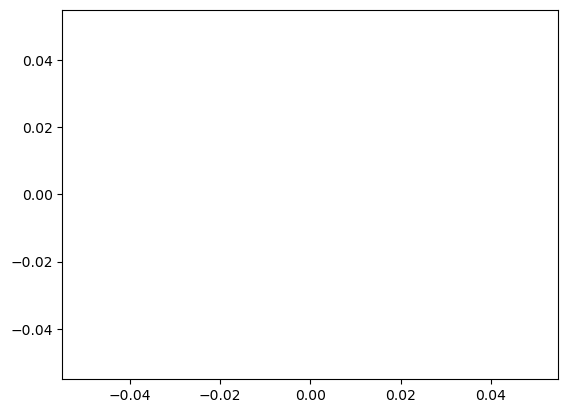

In [39]:
plt.plot(testdata)

In [41]:
unscaledtd = pd.read_csv('data/currestat.csv')

unscaled_testdata = pd.read_csv('data/mweu.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/currestat.csv'